In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
sns.set_style( style = 'dark')

# About the dataset (Adult Income Data)
The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person.
Attribute information:

## age: Age of an individual

## workclass: Working class of the individual

## fnlwgt: Weights based on the demographic characteristics

## education: Highest education of the individual

## education.num: Education encoded with unique numbers

## marital.status: Marital status of the individual

## occupation: Occupation of the individual

## relationship: Relation of the individual in the family

## race: Race of the individual

## sex: Gender of the individual

## capital.gain: Gain amount of the individual

## capital.loss: Loss amount of the individual

## hours.per.week: Working hours per week

## native.country: The native country of the individual

## income: Income of the individual

In [2]:
dataset = ('/content/adult.csv')
df = pd.read_csv(dataset, encoding='latin-1')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The average gain amount of an individual is 1077.64. and The average gain amount of an individual is 87.30.

50% of the people have 10 as a unique education number.

The max age of an individual has gone upto 90 years.

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

No null values are present in the dataset. We can proceed with Exploratory Data Analysis.

## EDA

# Quantitative and Quantitative Analysis

## Let's check is there any effect of a person's age on the working hours.

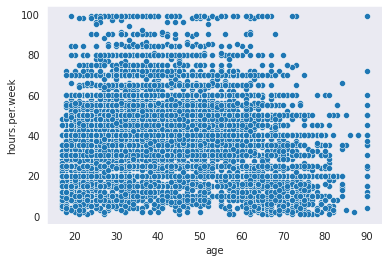

In [8]:
sns.scatterplot( x ="age" , y = "hours.per.week",data = df)
plt.show()

Age has particularly no relationship with working hours per week , the ages of people ranges max from 20 to 80.

# Analyzing the trend of the capital gain amount for different educational qualifications.

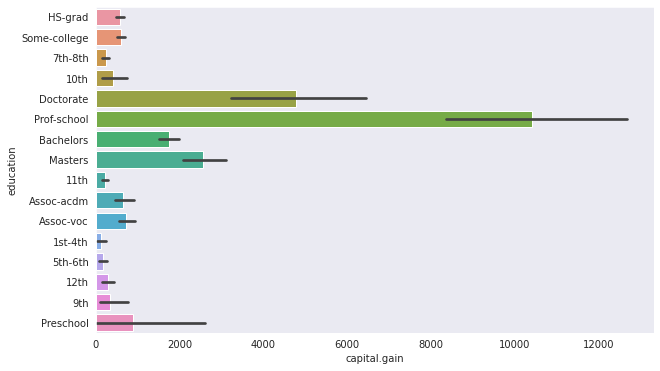

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(df["capital.gain"] , df["education"])
plt.show()

Professor in schools have a capital gain more than 10000 followed by Doctors having a capital gain around 5000.

## Effect of working hours of individuals on capital gain.

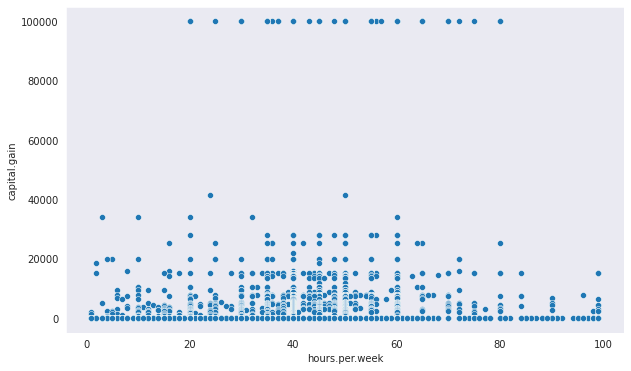

In [10]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = "hours.per.week" , y = "capital.gain" , data = df)
plt.show()

From the above scatterplot it is clear that people working 20 to 60 hours per week generally have more capital gain, some even have a capital gain of 100000 working upto 80 hours per week.

## Trend in the average working hours corresponding to the age of an individual.

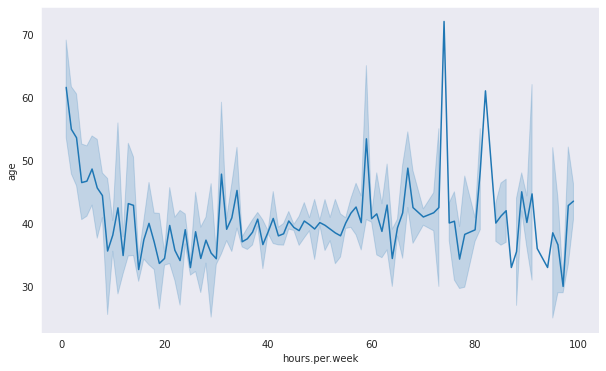

In [11]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "hours.per.week" , y = "age" , data  = df)
plt.show()

From the lineplot it is evident that the age of working hours per week of people is generally between 25 to 60 , also there is a peak around indicates that the age of people can go upto 70 years working 75 hours per week.

## Distribution of the average capital loss corresponding to the age.


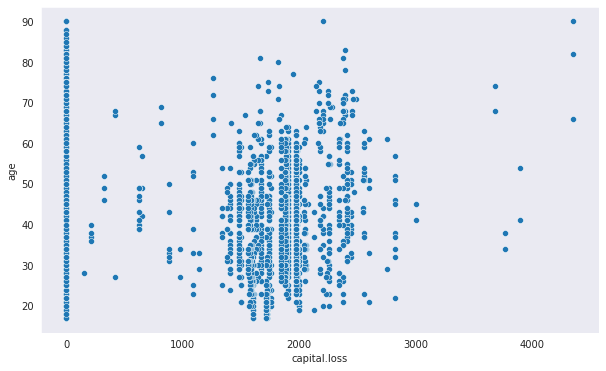

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot( x ="capital.loss", y = "age" , data = df)
plt.show()

People generally have ages between 20 to 60 with a capital loss ranging between 1500 to 2500.

# Relationship between capital gain and age.

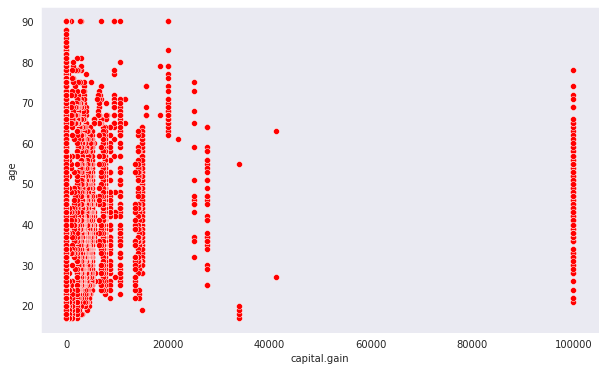

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot( x ="capital.gain" , y = "age" , data = df , color = 'r')
plt.show()

## Categorical and Quantitative Analysis

## Distribution of working hours for the distinct classes of income.

In [14]:
df_2 = (df.groupby(['income' , 'workclass']).workclass.count() / df.groupby(['income']).workclass.count()) * 100
df_2

income  workclass       
<=50K   ?                    6.654531
        Federal-gov          2.382686
        Local-gov            5.970874
        Never-worked         0.028317
        Private             71.735437
        Self-emp-inc         1.998382
        Self-emp-not-inc     7.350324
        State-gov            3.822816
        Without-pay          0.056634
>50K    ?                    2.435914
        Federal-gov          4.731539
        Local-gov            7.868894
        Private             63.295498
        Self-emp-inc         7.932662
        Self-emp-not-inc     9.233516
        State-gov            4.501977
Name: workclass, dtype: float64

## Working hours for each working class.

In [15]:
df[['workclass' , 'hours.per.week']].groupby('workclass').mean()

,hours.per.week
workclass,
?,31.919390
Federal-gov,41.379167
Local-gov,40.982800
Never-worked,28.428571
Private,40.267096
Self-emp-inc,48.818100
Self-emp-not-inc,44.421881
State-gov,39.031587
Without-pay,32.714286


## Analysis of income of individuals based on their education.

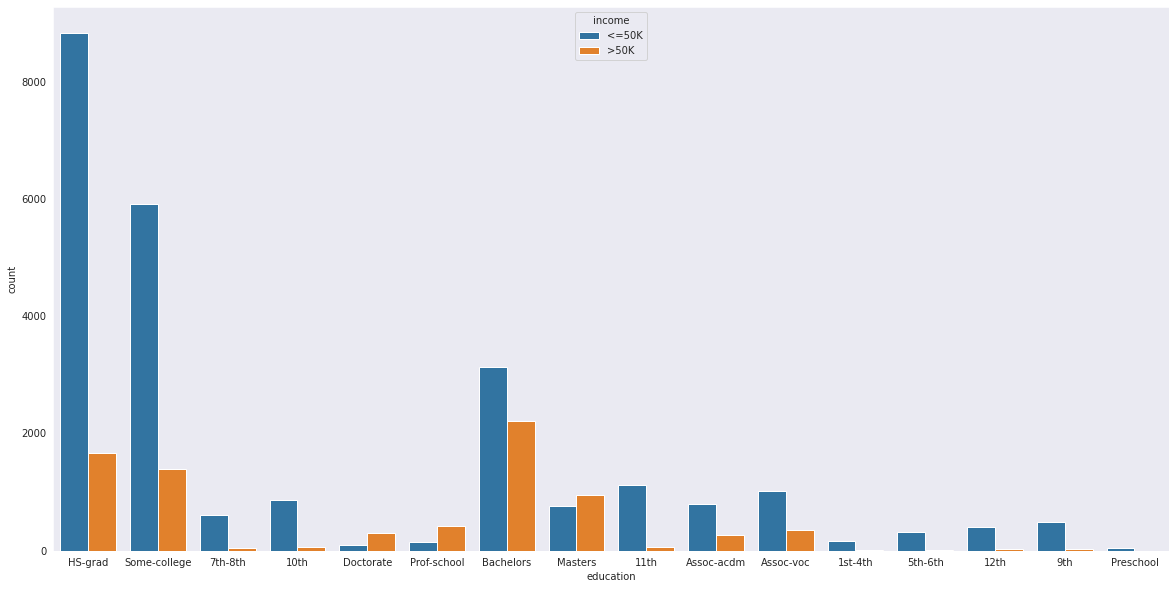

In [16]:
plt.figure(figsize = (20,10))
df_1 = float(len(df["income"]))
ax = sns.countplot(x ="education" , hue = "income" , data = df)
plt.show()

## Distribution of working hours with respect to the gender of the individual.

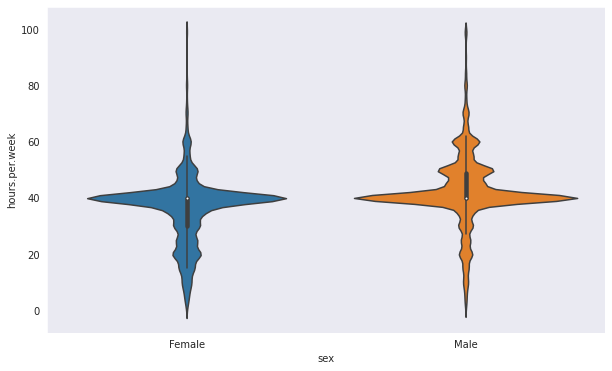

In [17]:
plt.figure(figsize = (10,6))
sns.violinplot( y = "hours.per.week" , x = "sex" , data = df)
plt.show()

Both Male and Female have an equal median hours per week, Male having working hours upto 70.

## Categorical and Categorical Analysis

## Variation in income by gender.

<Figure size 720x432 with 0 Axes>

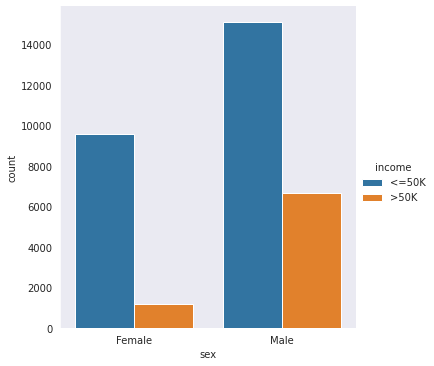

In [18]:
plt.figure(figsize = (10,6))
sns.catplot(x = "sex" , hue = "income" , kind = "count", data =  df)
plt.show()

Around 15000 Males have less than 50k income , around 9000 females have less than 50k income while around 6000 Males have greater than 50k income and around 1000 females have less than 50k income, which is a big difference in terms of Incomes between Males and Females.

## Effect of Sex on Profession.

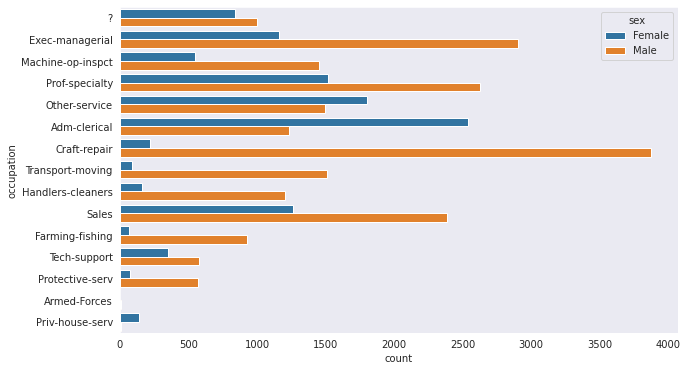

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(y ="occupation" , hue = "sex" , data = df)
plt.show()

Males are dominating Females in every Occupation (except in Adm clerical and other service) highest in Craft Repair , Executive Manangerial and Sales post.

Interestingly females in Adm clerical is the highest compared to Males.

## Effect of Income related to marital status.

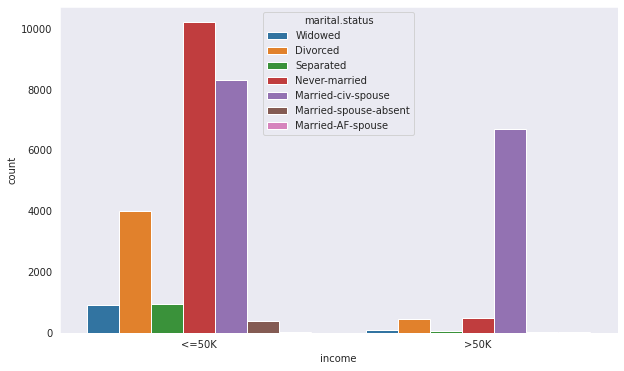

In [20]:
plt.figure(figsize = (10,6))
sns.countplot( x = "income" , hue = "marital.status" , data = df)
plt.show()

10000 Never Married people have income less than 50k and around 8000 Married civ spouse have income less than 50k.

Around 6000 Married civ spouse have income greater than 50k.

## Distribution of Income for different occupations.

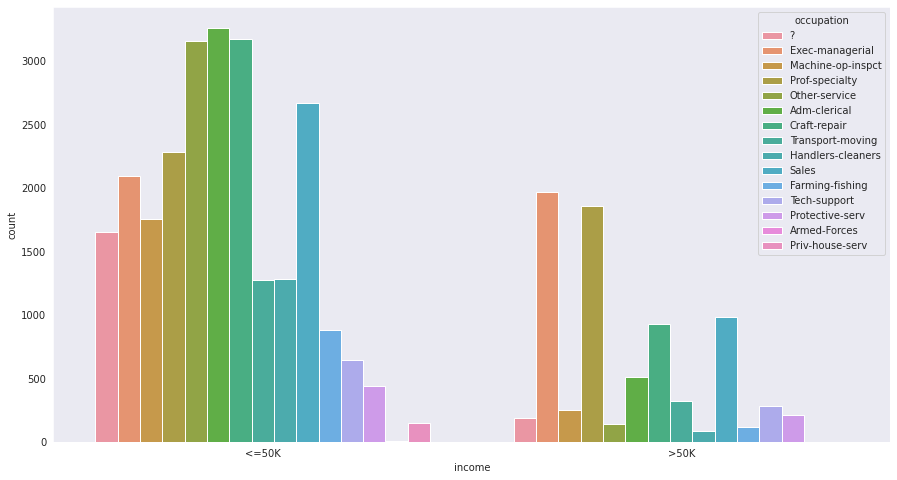

In [21]:
plt.figure(figsize =(15,8))
sns.countplot(x = "income" , hue = "occupation" , data = df , palette=None, saturation=0.75, dodge=True)
plt.show()

Setting independent and target variable.

In [22]:
X = df.drop(['income'], axis=1)
y = df['income']

In [23]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


Splitting the dataset into training and test set before modelling.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Encoding categorical variables.

In [25]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

## Scaling the test and train data.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [27]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.134215,-1.494279,-0.332263,1.133894,-0.402341,-0.600270,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.292864
1,0.028248,-1.279379,0.438778,0.184396,-0.423425,-0.402341,0.109933,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.292864
2,0.247956,0.086059,0.045292,1.217715,-0.034095,0.926666,-0.600270,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.292864
3,-0.850587,-1.279379,0.793152,0.184396,-0.423425,0.926666,-0.363535,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.292864
4,-0.044989,-1.962098,-0.853275,0.442726,1.523223,-0.402341,-0.600270,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.292864


In [28]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.273263,0.086059,0.798307,-1.107252,-1.980744,2.255673,1.293604,1.591474,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.292864
1,-1.436476,0.086059,0.448823,0.184396,-0.423425,0.926666,-0.126801,0.968753,0.39298,-1.430470,-0.145189,-0.217407,-1.256397,0.292864
2,-1.143531,0.086059,-0.608164,1.217715,-0.034095,0.926666,0.346667,-0.276689,-3.14167,-1.430470,-0.145189,-0.217407,-0.444363,0.420259
3,-0.118225,-1.962098,-1.332357,-0.332263,1.133894,-0.402341,0.820136,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.292864
4,0.760610,0.086059,2.202540,0.442726,1.523223,-0.402341,1.293604,-0.899410,0.39298,0.699071,-0.145189,-0.217407,0.773687,0.292864


Applying Logistic Regression Model upon the dataset.

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.8204


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n Confustion Matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\n Test Accuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\n Classification Report')
print(classification_report(y_test, y_pred))


 Confustion Matrix
[[6981  429]
 [1326 1033]]

 Test Accuracy
0.8203500870099294

 Classification Report
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.77      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769



Applying Decision tree Model upon the dataset.

In [31]:
dct = tree.DecisionTreeClassifier()
model_2 = dct.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n Confustion Matrix')
print(confusion_matrix(y_test, pred_2))

from sklearn.metrics import accuracy_score
print('\n Test Accuracy')
print(accuracy_score(y_test, pred_2))

from sklearn.metrics import classification_report
print('\n Classification Report')
print(classification_report(y_test, pred_2))


 Confustion Matrix
[[6478  932]
 [ 914 1445]]

 Test Accuracy
0.8110349063363701

 Classification Report
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      7410
        >50K       0.61      0.61      0.61      2359

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



Applying Random Forest Classifier Model upon the dataset.

In [33]:
rf = RandomForestClassifier()
model_3 = rf.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfustion Matrix')
print(confusion_matrix(y_test, pred_3))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test, pred_3))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, pred_3))


Confustion Matrix
[[6932  478]
 [ 937 1422]]

Test Accuracy
0.8551540587572934

Classification Report
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.75      0.60      0.67      2359

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Applying Gaussian Naive Bayes Model upon the dataset.

In [35]:
NB = GaussianNB()
model_4 = NB.fit(X_train,y_train)
pred_4 = model_4.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfustion Matrix')
print(confusion_matrix(y_test, pred_3))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test, pred_3))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, pred_3))


Confustion Matrix
[[6932  478]
 [ 937 1422]]

Test Accuracy
0.8551540587572934

Classification Report
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7410
        >50K       0.75      0.60      0.67      2359

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Applying K-Neighbors Classifier Model upon the dataset.

In [37]:
classifier = KNeighborsClassifier()
model_5 = classifier.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfustion Matrix')
print(confusion_matrix(y_test, pred_5))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test, pred_5))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, pred_5))


Confustion Matrix
[[6720  690]
 [ 989 1370]]

Test Accuracy
0.8281297983416931

Classification Report
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7410
        >50K       0.67      0.58      0.62      2359

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



Applying eXtreme Gradient Boosting Classifier Model upon the dataset.

In [39]:
XGBClassifier = XGBClassifier()
model_6 = XGBClassifier.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfustion Matrix')
print(confusion_matrix(y_test, pred_6))

from sklearn.metrics import accuracy_score
print('\nTest Accuracy')
print(accuracy_score(y_test, pred_6))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, pred_6))


Confustion Matrix
[[7063  347]
 [1014 1345]]

Test Accuracy
0.8606817483877572

Classification Report
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7410
        >50K       0.79      0.57      0.66      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769



## Random Forest , Gaussian Naive Bayes and XGB gives the same accuracy of 86% on the dataset.